# Stack Overflow Data - 2017 Survey

### 1. Business Understanding

You might have different questions about the 2017 StackOverflow survey data than I looked at earlier in the course. If you choose this dataset, you can not use the same questions that were analyzed earlier in the classroom.

Alternatively, if you felt pretty confident with the techniques in this lesson, you might be looking to push the envelope. In this case, you may choose to retrieve all of the Stack Overflow Survey - Multiple Years results. From this data, you could analyze trends over time. 
* What languages were most popular in each year? 
* What databases were most popular in each year?
* What countries were most popular in each year?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### 2. Gather Data
The dataset used in this project is downloaded from [Stack Overflow Annual Developer Survey
](https://insights.stackoverflow.com/survey). It consists of the survey datasets from 2017 to 2020.

### 3. Assess Data
By browsering through the fields of raw data, I observed that the surveys from 2017 to 2020 have the required fields of programming languages, databases, and countries. 

### 4. Clean Data
For a given field such as programming languages, all of the missing data records are dropped in determining 
their ranks so that missing data will not impact the result of trend analysis.

In [2]:
def getLanguageInfo(column_name, year):
    '''
    this function reads dataset as DataFrame, calculate the usage frequences 
    of the categories in the given column, and rank the categories (rank 1 is the highest)
    according to the usage frequencies.
    '''
    fpath = './data/survey_results_public_{}.csv'.format(year)
    df = pd.read_csv(fpath)
    
    # drop NaN rows
    df = df[df[column_name].notna()]
    
    # calculate usage frequence
    lang_df = pd.DataFrame(df[column_name].value_counts() / df.shape[0])
    
    # add ranks
    lang_df['Rank'] = range(1, len(lang_df.index) + 1)
    
    # add year
    lang_df['Year'] = year
    
    return lang_df

### Question 1. What languages were most popular in each year?

#### Analysing Data

In order to analyze the trend over time, first the usage frequences 
of the categories for a given field are calculated and ranked (rank 1 is the highest)
according to the usage frequencies. Then the ranks in different years of a given field are identified.

In [3]:
lang_2020_df = getLanguageInfo("LanguageWorkedWith", 2020)
print(lang_2020_df.shape)
lang_2020_df.head(10)

(14256, 3)


,LanguageWorkedWith,Rank,Year
HTML/CSS;JavaScript;PHP;SQL,0.018701,1,2020
HTML/CSS;JavaScript,0.015685,2,2020
C#;HTML/CSS;JavaScript;SQL,0.014919,3,2020
C#;HTML/CSS;JavaScript;SQL;TypeScript,0.013141,4,2020
HTML/CSS;JavaScript;TypeScript,0.012148,5,2020
Python,0.011346,6,2020
Java,0.010021,7,2020
HTML/CSS;JavaScript;PHP,0.009150,8,2020
C#,0.007250,9,2020
HTML/CSS;Java;JavaScript;SQL,0.006814,10,2020


In [4]:
lang_2019_df = getLanguageInfo("LanguageWorkedWith", 2019)
print(lang_2019_df.shape)
lang_2019_df.head(10)

(20098, 3)


,LanguageWorkedWith,Rank,Year
HTML/CSS;JavaScript;PHP;SQL,0.016935,1,2019
C#;HTML/CSS;JavaScript;SQL,0.016147,2,2019
HTML/CSS;JavaScript,0.014240,3,2019
C#;HTML/CSS;JavaScript;SQL;TypeScript,0.011305,4,2019
Java,0.010666,5,2019
HTML/CSS;JavaScript;PHP,0.010392,6,2019
Python,0.008667,7,2019
HTML/CSS;JavaScript;TypeScript,0.008028,8,2019
HTML/CSS;Java;JavaScript;SQL,0.007663,9,2019
C#,0.006429,10,2019


In [5]:
lang_2018_df = getLanguageInfo("LanguageWorkedWith", 2018)
print(lang_2018_df.shape)
lang_2018_df.head(10)

/Users/yuhuang/anaconda3/envs/deeplearning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(26678, 3)


,LanguageWorkedWith,Rank,Year
C#;JavaScript;SQL;HTML;CSS,0.017196,1,2018
JavaScript;PHP;SQL;HTML;CSS,0.015766,2,2018
Java,0.013149,3,2018
JavaScript;HTML;CSS,0.011247,4,2018
C#;JavaScript;SQL;TypeScript;HTML;CSS,0.010570,5,2018
JavaScript;PHP;SQL;HTML;CSS;Bash/Shell,0.009804,6,2018
JavaScript;PHP;HTML;CSS,0.009255,7,2018
Java;JavaScript;SQL;HTML;CSS,0.006766,8,2018
C#,0.006268,9,2018
Python,0.005094,10,2018


In [6]:
lang_2017_df = getLanguageInfo("HaveWorkedLanguage", 2017)
lang_2017_df.columns = ['LanguageWorkedWith', 'Rank', 'Year']
print(lang_2017_df.shape)
lang_2017_df.head(10)

(8438, 3)


,LanguageWorkedWith,Rank,Year
C#; JavaScript; SQL,0.034840,1,2017
JavaScript; PHP; SQL,0.031208,2,2017
Java,0.024928,3,2017
JavaScript,0.022034,4,2017
JavaScript; PHP,0.018075,5,2017
Java; JavaScript; SQL,0.017611,6,2017
Java; JavaScript,0.015973,7,2017
C#,0.014744,8,2017
Python,0.014444,9,2017
C#; JavaScript,0.013652,10,2017


In [7]:
#
# no language column!!!
#
# lang_2016_df = getLanguageInfo("HaveWorkedLanguage", 2016)
# print(lang_2016_df.shape)
# ang_2016_df.head(10)

In [8]:
# combine the different dataframes for different years into one
lang_df = pd.concat([lang_2017_df, lang_2018_df, lang_2019_df, lang_2020_df])
lang_df.shape

(69470, 3)

In [9]:
# find the ranks of Python language in different years
python_df = lang_df.loc["Python"]
python_df

,LanguageWorkedWith,Rank,Year
Python,0.014444,9,2017
Python,0.005094,10,2018
Python,0.008667,7,2019
Python,0.011346,6,2020


In [10]:
# find the ranks of Java language in different years
java_df = lang_df.loc["Java"]
java_df

,LanguageWorkedWith,Rank,Year
Java,0.024928,3,2017
Java,0.013149,3,2018
Java,0.010666,5,2019
Java,0.010021,7,2020


#### Visualizing Data

For a given field, the identified ranks in different years are shown as bar chart. 

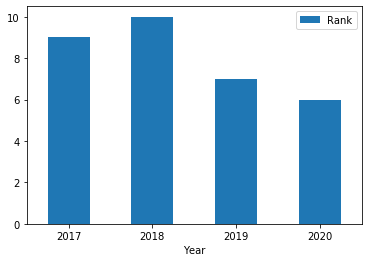

In [11]:
python_ax = python_df.plot.bar(x='Year', y='Rank', rot=0)

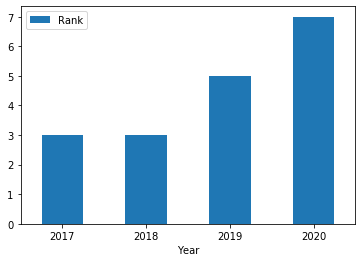

In [12]:
java_ax = java_df.plot.bar(x='Year', y='Rank', rot=0)

### Question 2. What databases were most popular in each year?

#### Analysing Data

In order to analyze the trend over time, first the usage frequences 
of the categories for a given field are calculated and ranked (rank 1 is the highest)
according to the usage frequencies. Then the ranks in different years of a given field are identified.

In [13]:
db_2020_df = getLanguageInfo("DatabaseWorkedWith", 2020)
print(db_2020_df.shape)
db_2020_df.head(10)

(2808, 3)


,DatabaseWorkedWith,Rank,Year
MySQL,0.077255,1,2020
Microsoft SQL Server,0.066576,2,2020
PostgreSQL,0.039102,3,2020
SQLite,0.026505,4,2020
Microsoft SQL Server;MySQL,0.023376,5,2020
MySQL;SQLite,0.021802,6,2020
MongoDB,0.019682,7,2020
MariaDB;MySQL,0.017825,8,2020
MySQL;PostgreSQL,0.017442,9,2020
MongoDB;MySQL,0.016533,10,2020


In [14]:
db_2019_df = getLanguageInfo("DatabaseWorkedWith", 2019)
print(db_2019_df.shape)
db_2019_df.head(10)

(3478, 3)


,DatabaseWorkedWith,Rank,Year
MySQL,0.073080,1,2019
Microsoft SQL Server,0.067924,2,2019
PostgreSQL,0.034383,3,2019
SQLite,0.026662,4,2019
Microsoft SQL Server;MySQL,0.024571,5,2019
MySQL;SQLite,0.021045,6,2019
MongoDB,0.017507,7,2019
MariaDB;MySQL,0.017336,8,2019
Oracle,0.016665,9,2019
MySQL;PostgreSQL,0.015245,10,2019


In [15]:
db_2018_df = getLanguageInfo("DatabaseWorkedWith", 2018)
print(db_2018_df.shape)
db_2018_df.head(10)

(6877, 3)


,DatabaseWorkedWith,Rank,Year
MySQL,0.090056,1,2018
SQL Server,0.076807,2,2018
SQL Server;MySQL,0.045526,3,2018
PostgreSQL,0.031553,4,2018
MySQL;PostgreSQL,0.021126,5,2018
SQLite,0.020115,6,2018
MongoDB,0.018002,7,2018
MongoDB;MySQL,0.017896,8,2018
MySQL;MariaDB,0.015965,9,2018
MySQL;SQLite,0.014999,10,2018


In [16]:
db_2017_df = getLanguageInfo("HaveWorkedDatabase", 2017)
db_2017_df.columns = ['DatabaseWorkedWith', 'Rank', 'Year']
print(db_2017_df.shape)
db_2017_df.head(10)

(237, 3)


,DatabaseWorkedWith,Rank,Year
MySQL,0.144438,1,2017
SQL Server,0.128752,2,2017
SQL Server; MySQL,0.051677,3,2017
PostgreSQL,0.043834,4,2017
MySQL; SQLite,0.042612,5,2017
SQLite,0.035040,6,2017
Oracle,0.030422,7,2017
MySQL; PostgreSQL,0.028487,8,2017
MongoDB; MySQL,0.026110,9,2017
MongoDB,0.026008,10,2017


In [17]:
# combine the different dataframes for different years into one
db_df = pd.concat([db_2017_df, db_2018_df, db_2019_df, db_2020_df])
db_df.shape

(13400, 3)

In [18]:
# find the ranks of Oracle database in different years
oracle_df = db_df.loc["Oracle"]
oracle_df

,DatabaseWorkedWith,Rank,Year
Oracle,0.030422,7,2017
Oracle,0.010819,13,2018
Oracle,0.016665,9,2019
Oracle,0.014474,11,2020


In [19]:
# find the ranks of PostgreSql database in different years
postgresql_df = db_df.loc["PostgreSQL"]
postgresql_df

,DatabaseWorkedWith,Rank,Year
PostgreSQL,0.043834,4,2017
PostgreSQL,0.031553,4,2018
PostgreSQL,0.034383,3,2019
PostgreSQL,0.039102,3,2020


#### Visualizing Data

For a given field, the identified ranks in different years are shown as bar chart. 

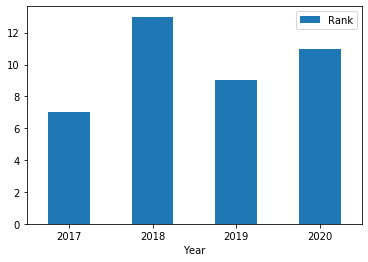

In [20]:
oracle_ax = oracle_df.plot.bar(x='Year', y='Rank', rot=0)

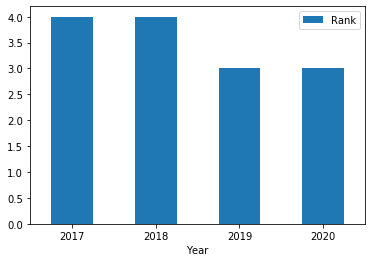

In [21]:
postgresql_ax = postgresql_df.plot.bar(x='Year', y='Rank', rot=0)

### Question 3. What countries were most popular in each year?

#### Analysing Data 

The following tables show the top 10 countries from 2017 to 2020.

In [22]:
country_2020_df = getLanguageInfo("Country", 2020)
print(country_2020_df.shape)
country_2020_df.head(10)

(183, 3)


,Country,Rank,Year
United States,0.194609,1,2020
India,0.131149,2,2020
United Kingdom,0.060807,3,2020
Germany,0.060713,4,2020
Canada,0.034196,5,2020
France,0.029623,6,2020
Brazil,0.028374,7,2020
Netherlands,0.020961,8,2020
Poland,0.019946,9,2020
Australia,0.018854,10,2020


In [23]:
country_2019_df = getLanguageInfo("Country", 2019)
print(country_2019_df.shape)
country_2019_df.head(10)

(179, 3)


,Country,Rank,Year
United States,0.236042,1,2019
India,0.102095,2,2019
Germany,0.066095,3,2019
United Kingdom,0.064642,4,2019
Canada,0.038253,5,2019
France,0.026941,6,2019
Brazil,0.021949,7,2019
Poland,0.021656,8,2019
Australia,0.021442,9,2019
Netherlands,0.020867,10,2019


In [24]:
country_2018_df = getLanguageInfo("Country", 2018)
print(country_2018_df.shape)
country_2018_df.head(10)

(183, 3)


,Country,Rank,Year
United States,0.206302,1,2018
India,0.139380,2,2018
Germany,0.065612,3,2018
United Kingdom,0.063194,4,2018
Canada,0.034467,5,2018
Russian Federation,0.029144,6,2018
France,0.026127,7,2018
Brazil,0.025446,8,2018
Poland,0.021556,9,2018
Australia,0.020499,10,2018


In [25]:
country_2017_df = getLanguageInfo("Country", 2018)
print(country_2017_df.shape)
country_2017_df.head(10)

(183, 3)


,Country,Rank,Year
United States,0.206302,1,2018
India,0.139380,2,2018
Germany,0.065612,3,2018
United Kingdom,0.063194,4,2018
Canada,0.034467,5,2018
Russian Federation,0.029144,6,2018
France,0.026127,7,2018
Brazil,0.025446,8,2018
Poland,0.021556,9,2018
Australia,0.020499,10,2018


In [26]:
country_df = pd.concat([country_2017_df, country_2018_df, country_2019_df, country_2020_df])
country_df.shape

(728, 3)

In [27]:
us_df = country_df.loc["United States"]
us_df

,Country,Rank,Year
United States,0.206302,1,2018
United States,0.206302,1,2018
United States,0.236042,1,2019
United States,0.194609,1,2020


In [28]:
india_df = country_df.loc["India"]
india_df

,Country,Rank,Year
India,0.139380,2,2018
India,0.139380,2,2018
India,0.102095,2,2019
India,0.131149,2,2020


#### Explaining Result

I observed that the top 10 countries remain the same in the last 4 years from 2017 to 2020.

### References
#### Schema Information

In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', 1000)
df1 = pd.read_csv('./data/survey_results_schema_2020.csv')
df1.head(100)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."
